In [1]:
%run imports.ipynb

### SNUH 환자 HMA response와 bivLPMD와의 관계

In [2]:
meta = pd.read_excel('../note2/metadata/SNUH_targetedBS_metadata.xlsx')

In [3]:
meta

,ID,filename,response,age,gender
0,7349,GO-211202-0007,CR,70,M
1,7683,GO-211202-0023,PD,72,M
2,7549,GO-211202-0008,CR,52,F
3,7692,GO-211202-0009,CR,65,M
4,7666,GO-211202-0003,HI,71,M
5,7196,GO-211202-0021,PD,67,M
6,7720,GO-211202-0010,PD,64,M
7,7366,GO-211202-0022,PD,73,M
8,7783,GO-211202-0014,NR,79,M
9,7103,GO-211202-0012,PR,71,F


In [4]:
lpmd_files = glob.glob('/data2/project/SNUH_DNMT3A/pipelines/SNUH-TARGETED-BS-METHEOR/result/*.lpmd.csv')
len(lpmd_files)

37

In [5]:
extract_name = lambda x: os.path.basename(x).split('.')[0]

lpmd_result = pd.concat([pd.read_csv(f, sep='\t') for f in lpmd_files])
lpmd_result['name'] = lpmd_result.name.apply(extract_name)

lpmd_result = lpmd_result.merge(meta, left_on='name', right_on='filename')

lpmd_result = lpmd_result.dropna().reset_index(drop=True)
lpmd_result['is_CR'] = (lpmd_result.response == 'CR')

In [6]:
from scipy.stats import ttest_ind, mannwhitneyu

mannwhitneyu(
    lpmd_result[lpmd_result.is_CR].lpmd,
    lpmd_result[~lpmd_result.is_CR].lpmd,
)

MannwhitneyuResult(statistic=21.0, pvalue=0.006570056032353192)

In [7]:
lpmd_result[['ID', 'lpmd', 'is_CR', 'age', 'gender']].to_csv('source_data/snuh_hma_response.csv', index=False)

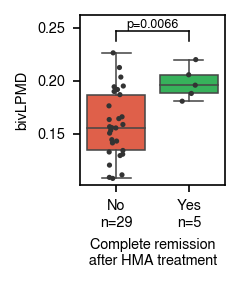

In [12]:
palette = [
    '#F84F31',
    '#23C552',
]
fig = plt.figure(figsize=(1.25, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(data=lpmd_result, x='is_CR', y='lpmd', palette=palette, saturation=0.75, ax=ax)
sns.stripplot(data=lpmd_result, x='is_CR', y='lpmd', palette=['0.2']*2, ax=ax)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax + 0.03)

ax.plot([0, 1], [ymax + 0.015, ymax + 0.015], c='k')
ax.plot([0, 0], [ymax + 0.005, ymax + 0.015], c='k')
ax.plot([1, 1], [ymax + 0.005, ymax + 0.015], c='k')
ax.text(0.5, ymax + 0.015, 'p=0.0066', va='bottom', ha='center', fontsize=6)

ax.set_xlabel('Complete remission\nafter HMA treatment')
ax.set_ylabel('bivLPMD')
ax.set_xticklabels([f'No\nn={(~lpmd_result.is_CR).sum()}', f'Yes\nn={(lpmd_result.is_CR).sum()}'])

save_figures('source_data_figures/snuh_targeted_bs/snuh_hma_response')